# 파이썬으로 확률을 계산하는 방법법
## 1.1 표본 공간 분석: 방정식 없이 결과의 불확실성을 측정하는 접근법
표본 공간: 어떤 행동에 따라 발생할 수 있는 모든 결과의 집합

In [2]:
sample_space = {'앞면', '뒷면'}
sample_space

{'뒷면', '앞면'}

In [3]:
probability_heads = 1/len(sample_space)
print(f'앞면이 선택될 확률 {probability_heads}입니다')

앞면이 선택될 확률 0.5입니다


사건: 표본 공간의 요소 중 어떤 사건의 조건을 만족하는 것들의 부분 집합

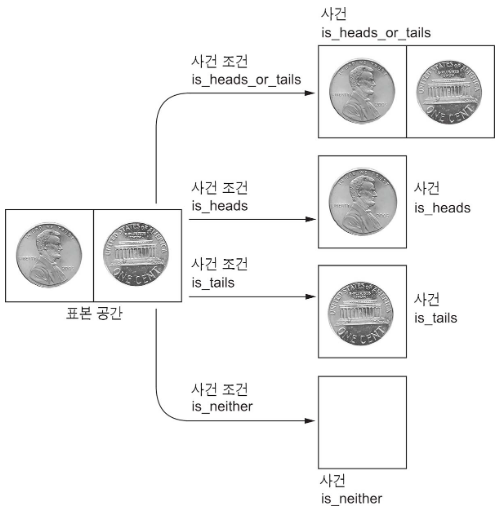

In [4]:
# 동전이 앞면 혹은 뒷면으로 떨어질 경우
def is_heads_or_tails(outcome): return outcome in {'앞면', '뒷면'}
# 동전이 앞면으로도, 뒷면으로도 떨어지지 않을 경우
def is_neither(outcome): return not is_heads_or_tails(outcome)

In [5]:
# 동전이 앞면으로 떨어질 경우
def is_heads(outcome): return outcome == '앞면'
# 동전이 뒷면으로 떨어질 경우
def is_tails(outcome): return outcome == '뒷면'

In [6]:
# 모든 결과들의 집합에서 특정 조건을 만족하는지 검사
def get_matching_event(event_condition, sample_space):
    return {outcome for outcome in sample_space 
             if event_condition(outcome)}

In [7]:
event_conditions = [is_heads_or_tails, is_heads, is_tails, is_neither]

for event_condition in event_conditions:
    print(f'사건 조건: {event_condition.__name__}')
    event = get_matching_event(event_condition, sample_space)
    print(f'사건: {event}\n')

사건 조건: is_heads_or_tails
사건: {'뒷면', '앞면'}

사건 조건: is_heads
사건: {'앞면'}

사건 조건: is_tails
사건: {'뒷면'}

사건 조건: is_neither
사건: set()



In [8]:
# 사건 조건 별 확률 계산 함수
def compute_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    return len(event) / len(generic_sample_space)


for event_condition in event_conditions:
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f"'{name}'에서 발생한 사건의 확률은 '{prob}'입니다")

'is_heads_or_tails'에서 발생한 사건의 확률은 '1.0'입니다
'is_heads'에서 발생한 사건의 확률은 '0.5'입니다
'is_tails'에서 발생한 사건의 확률은 '0.5'입니다
'is_neither'에서 발생한 사건의 확률은 '0.0'입니다


### 1.1.1 편향된 동전 분석
동전이 떨어질 때 뒷면보다 앞면일 확률이 4배 더 높다고 가정.

In [9]:
# 가중치 할당
weighted_sample_space = {'앞면': 4, '뒷면': 1}

In [10]:
# 표본 공간 크기를 딕셔너리의 모든 가중치 합으로 재정의
sample_space_size = sum(weighted_sample_space.values())
# assert: 참인지 디버깅
assert sample_space_size == 5

In [11]:
# 사건의 크기를 가중치의 합으로 재정의
event = get_matching_event(is_heads_or_tails, weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event)
# 합이 5인지 디버깅
assert event_size == 5

In [12]:
# 일반화된 사건 확률 함수 정의
def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    # 함수의 타입이 set인지 확인
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)
    
    event_size = sum(generic_sample_space[outcome] for outcome in event)
    return event_size / sum(generic_sample_space.values())

In [13]:
for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"'{name}'에서 발생한 사건의 확률은 {prob}입니다")

'is_heads_or_tails'에서 발생한 사건의 확률은 1.0입니다
'is_heads'에서 발생한 사건의 확률은 0.8입니다
'is_tails'에서 발생한 사건의 확률은 0.2입니다
'is_neither'에서 발생한 사건의 확률은 0.0입니다


## 1.2 사소한 확률 계산 문제
### 1.2.1 문제1: 네 자녀를 둔 가족 분석하기
어느 가족에게 네 명의 자녀가 있을 때 이 중 정확히 두 명이 남아일 확률

In [14]:
# 자녀에 대한 표본 공간 계산하기
possible_children = ['Boy', 'Girl']
sample_space = set()

for child1 in possible_children:
    for chile2 in possible_children:
        for child3 in possible_children:
            for child4 in possible_children:
                outcome = (child1, chile2, child3, child4)
                sample_space.add(outcome)

print(f'자녀의 표본 공간: {sample_space}')

자녀의 표본 공간: {('Boy', 'Boy', 'Boy', 'Girl'), ('Girl', 'Girl', 'Girl', 'Girl'), ('Boy', 'Boy', 'Boy', 'Boy'), ('Girl', 'Girl', 'Girl', 'Boy'), ('Boy', 'Boy', 'Girl', 'Girl'), ('Boy', 'Boy', 'Girl', 'Boy'), ('Boy', 'Girl', 'Girl', 'Girl'), ('Boy', 'Girl', 'Girl', 'Boy'), ('Girl', 'Girl', 'Boy', 'Boy'), ('Girl', 'Girl', 'Boy', 'Girl'), ('Boy', 'Girl', 'Boy', 'Girl'), ('Boy', 'Girl', 'Boy', 'Boy'), ('Girl', 'Boy', 'Girl', 'Girl'), ('Girl', 'Boy', 'Boy', 'Girl'), ('Girl', 'Boy', 'Girl', 'Boy'), ('Girl', 'Boy', 'Boy', 'Boy')}


In [15]:
# itertools를 사용한 자녀의 표본 공간 계산하기
from itertools import product
all_combinations = product(*(4*[possible_children]))
assert set(all_combinations) == sample_space

In [16]:
# product 함수에 매개변수 repeat를 사용하여 자녀의 표본 공간 계산하기
sample_space_efficient = set(product(possible_children, repeat=4))
assert sample_space == sample_space_efficient

In [17]:
# 두 명이 남아일 확률 계산하기
def has_two_boys(outcome): 
    return len([child for child in outcome if child == "Boy"]) == 2
prob = compute_event_probability(has_two_boys, sample_space)
print(f'남아 두 명이 포함되었을 확률은 {prob}입니다.')

남아 두 명이 포함되었을 확률은 0.375입니다.


### 1.2.2 문제 2: 다면체 주사위를 굴렸을 때 분석하기
6번 던져서 얻은 숫자를 모두 더했을 때 21일 확률 계산하기

In [18]:
# 육면체 주사위를 굴려 나올 수 있는 값 정의
possible_rolls = list(range(1, 7))
print(possible_rolls)

[1, 2, 3, 4, 5, 6]


In [19]:
# 주사위를 연속으로 6번 굴렸을 때의 표본 공간
sample_space = set(product(possible_rolls, repeat=6))

In [20]:
# 주사위를 굴린 합에 대한 확률 계산하기
def has_sum_of_21(outcome):
    return sum(outcome) == 21
prob = compute_event_probability(has_sum_of_21, sample_space)
print(f'주사위를 굴린 합이 21일 확률은 {prob}입니다.')

주사위를 굴린 합이 21일 확률은 0.09284979423868313입니다.


In [21]:
# 람다 표현식으로 확률 계산하기
prob = compute_event_probability(lambda x: sum(x) == 21, sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)

### 1.2.3 문제3: 가중된 표본 공간으로 주사위를 굴렸을 때 확률 계산하기

In [22]:
# 주사위 굴림의 합계별 등장 횟수 매핑하기
# defaultdict는 기본값을 설정할 수 있는 딕셔너리로, 존재하지 않는 키에 접근해도 자동으로 기본값을 생성
from collections import defaultdict
weighted_sample_space = defaultdict(int)
for outcome in sample_space:
    weighted_sample_space[sum(outcome)] += 1

In [23]:
# 매우 드문 주사위 굴림의 조합 확인하기
assert weighted_sample_space[6] == 1
assert weighted_sample_space[36] == 1

In [24]:
# 좀 더 흔한 주사위 굴림의 조합 확인하기
num_combinations = weighted_sample_space[21]
print(f'주사위를 6번 굴렸을 때의 합계가 21이 될 수 있는 조합 개수는 {num_combinations}입니다.')

주사위를 6번 굴렸을 때의 합계가 21이 될 수 있는 조합 개수는 4332입니다.


In [25]:
# 합계가 21이 될 수 있는 경우 탐색하기
assert sum([4, 4, 4, 4, 3, 2]) == 21
assert sum([4, 4, 4, 5, 3, 1]) == 21

In [26]:
# 가중된 사건과 그렇지 않은 사건 비교하기
event = get_matching_event(lambda x: sum(x) == 21, sample_space)
assert weighted_sample_space[21] == len(event)
assert sum(weighted_sample_space.values()) == len(sample_space)

In [27]:
# 가중된 사건의 확률 계산하기
prob = compute_event_probability(lambda x: x == 21, weighted_sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)
print(f'주사위를 6번 굴렸을 때의 합계가 21이 될 확률은 {prob}입니다.')

주사위를 6번 굴렸을 때의 합계가 21이 될 확률은 0.09284979423868313입니다.


In [28]:
# 가중되지 않은 표본 공간과 가중된 표본 공간의 크기 비교하기
print("가중되지 않은 표본 공간 내 요소 개수")
print(len(sample_space))
print("가중된 표본 공간 내 요소 개수")
print(len(weighted_sample_space))

가중되지 않은 표본 공간 내 요소 개수
46656
가중된 표본 공간 내 요소 개수
31


## 1.3 구간에 대한 확률 계산
여러 값을 동시에 만족하는 사건 조건 분석.</br>
구간: 두 경계를 포함한 사이에 있는 모든 숫자 집합을 의미.

In [29]:
# 구간 함수 정의하기
def is_in_interval(number, minimum, maximum):
    return minimum <= number <= maximum

정의한 함수를 활용하여 주사위를 6번 연속으로 굴렸을 때 합계가 10과 21(포함) 사이일 확률 구하기

In [30]:
# 구간에 대한 확률 계산하기
prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21), weighted_sample_space)
print(f'구간에 대한 확률은 {prob}입니다.')

구간에 대한 확률은 0.5446244855967078입니다.


### 1.3.1 구간 분석법으로 극단 평가
구간 분석: 확률과 통계에서 매우 중요한 문제인 전체 계급(whole class)를 해결하는데 대단히 중요. </br>
전체 계급 문제는 극단 평가(evalution of extremes)와 관련성 있음. 관측된 데이터가 믿을 수 없을 정도로 너무 극단적인지 여부로 귀결. </br>
공정하게 10번 뒤집었을 때 앞면이 8~10번 나타날 확률 구하기

In [31]:
# 동전 뒤집기 10번에 대한 표본 공간 계산하기
def generate_coin_sample_space(num_flips=10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(["앞면", "뒷면"], repeat=num_flips):
        heads_count = len([outcome for outcome in coin_flips if outcome == "앞면"])
        weighted_sample_space[heads_count] += 1
    return weighted_sample_space

weighted_sample_space = generate_coin_sample_space()
assert weighted_sample_space[10] == 1
assert weighted_sample_space[9] == 10

In [ ]:
# 극단적으로 앞면이 많이 나타날 확률 계산하기
prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10), weighted_sample_space)
print(f'앞면이 7번보다 많이 관측될 확률은 {prob}입니다.')

앞면이 7번보다 많이 관측될 확률은 0.0546875입니다.


In [33]:
# 극단적인 구간 확률 계산하기
prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7),
                                 weighted_sample_space)
print(f'앞면 또는 뒷면이 7번보다 많이 관측될 확률은 {prob}입니다')

앞면 또는 뒷면이 7번보다 많이 관측될 확률은 0.109375입니다


In [35]:
# 동전 뒤집기 20번에서 앞면이 극단적으로 많이 나타나는 경우 분석하기
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15),
                                 weighted_sample_space_20_flips)
print(f'앞면 또는 뒷면이 15번보다 많이 관측될 확률은 {prob}입니다.')

앞면 또는 뒷면이 15번보다 많이 관측될 확률은 0.01181793212890625입니다.


## 1.4 요약
- 표본 공간은 어떤 행동에 따라 관측될 수 있는 모든 가능한 결과 집합
- 사건은 표본 공간 중 어떤 사건 조건을 만족하는 결과들의 부분 집합. 사건 조건은 결과를 입력받아 참 또는 거짓을 반환하는 boolean 함수.
- 특정 사건의 확률은 전체 표본 공간의 모든 가능한 결과 중 해당 사건에 대한 부분과 같음
- 확률은 수치형 구간으로 계산될 수 있음. 간격은 두 경계값 사이에 위치한 모든 값의 집합으로 정의될 수 있음.
- 간격 확률은 관측된 결과가 극단적 경우인지 정하는 데 유용.